<H1>K-NN</H1>
<h2>Aprendizado de Máquinas</h2>
<p><b>Objetivo: </b>Classificação de amostras utilizando o algortimo de K-NN</p>
<p><b>Data: </b>03.09.2021</p>
<p><b>Autor: </b>Ricardo Favan</p>
<p><b> Aluno: </b> Carlos Nobuaki </p>
<p><b>Versão: </b>1.0</p>


In [1]:
# Importar as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

In [2]:
# Carregar conjunto de dados
df = pd.read_csv("Classified_Data.csv", index_col=0)
df

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


In [3]:
df.dtypes

WTT             float64
PTI             float64
EQW             float64
SBI             float64
LQE             float64
QWG             float64
FDJ             float64
PJF             float64
HQE             float64
NXJ             float64
TARGET CLASS      int64
dtype: object

In [4]:
# Preparar o conjunto de dados (Normalização / Scaler)
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS', axis=1))
# Aplicar o Scaler no dataset
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))
# Transformar o scaled em Data Frame
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [5]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [6]:
# Separa ente conjunto de "treinamento" e Teste
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['TARGET CLASS'], test_size=0.3)

In [7]:
# Configurar o algoritmo de K-NN
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [8]:
# Fazendo Predições
y_pred = knn.predict(X_test)

In [9]:
# Avaliar as métricas do algortimo (Matriz de Confusão)
print(confusion_matrix(y_test, y_pred))

[[124  10]
 [  8 158]]


In [10]:
# Avaliar as métricas do algortimo (Relatório de Classificação)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       134
           1       0.94      0.95      0.95       166

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [11]:
# Método Elbow para definir o valor de "K"
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

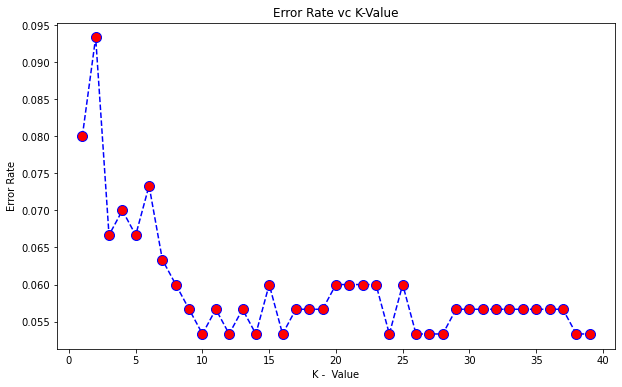

In [ ]:
# Gráfico do Método Elbow
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title("Error Rate vc K-Value")
plt.xlabel("K -  Value")
plt.ylabel("Error Rate")
plt.show()